# LogReg WOW 0.3 vs Miranda Attributes

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals
import os, random, time, MirandaAttributes, cv2
import tensorflow as tf
import pandas as pd
import numpy as np
from sklearn import preprocessing
import seaborn as sns
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [2]:
print("TensorFlow version: {}".format(tf.__version__))
print("Eager execution: {}".format(tf.executing_eagerly()))

#Miranda dataset
train_dataset_url = "https://raw.githubusercontent.com/intentodemusico/StegianV2/master/DatasetMiranda/features_train_70000.csv"
test_dataset_url = "https://raw.githubusercontent.com/intentodemusico/StegianV2/master/DatasetMiranda/features_test_70000.csv"

TensorFlow version: 2.3.0
Eager execution: True


In [3]:
#%% Importing the dataset
MirandaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Geometric_Mean', 'Mobility', 'Complexity']
trainDataset = pd.read_csv(train_dataset_url)
MirandaX_train = trainDataset.iloc[:, :-1].values
MirandaY_train = trainDataset.iloc[:, -1].values

testDataset = pd.read_csv(test_dataset_url)
MirandaX_test = testDataset.iloc[:, :-1].values
MirandaY_test = testDataset.iloc[:, -1].values

In [4]:
MirandaX_train

array([[1.502380e+01, 2.910000e+00, 2.747740e+02, ..., 1.604439e+02,
        1.477400e-01, 8.579000e-01],
       [2.801000e+00, 9.223200e-01, 2.357319e+02, ..., 1.453054e+02,
        1.200900e-01, 1.298700e+00],
       [3.988500e+00, 8.873200e-01, 1.745089e+02, ..., 1.826219e+02,
        2.003400e-01, 1.596500e+00],
       ...,
       [7.551800e+00, 2.032900e+00, 2.796423e+02, ..., 1.376493e+02,
        9.355000e-01, 1.760300e+00],
       [3.402200e+01, 4.804000e+00, 4.167042e+02, ..., 1.391423e+02,
        9.767900e-01, 1.521500e+00],
       [2.003410e+01, 3.686400e+00, 4.570151e+02, ..., 8.242910e+01,
        9.437100e-01, 1.696200e+00]])

In [5]:
#%% Feature Scaling
from sklearn.preprocessing import StandardScaler

In [6]:
MirandaLabels

['Kurtosis',
 'Skewness',
 'Std',
 'Range',
 'Median',
 'Geometric_Mean',
 'Mobility',
 'Complexity']

## Getting x and y

In [7]:
isStego=lambda x:1 if x[:6]=="stego_" else 0
getYFromImageList=lambda x: [isStego(element) for element in x]
folder="../../../Dataset/Mono/MonoSamples/WOW_5" 
images=os.listdir(folder)
random.shuffle(images)
images=images
print(len(images))

40000


In [8]:
Garciay=getYFromImageList(images)
windowSize=128
GarciaLabels=['Kurtosis', 'Skewness', 'Std', 'Range', 'Median', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility', 'Complexity']
t = time.time()

GarciaX=pd.DataFrame(([ MirandaAttributes.attributes( cv2.imread( os.path.abspath(os.path.join(folder, images[i]))
                                        ) ,windowSize,True)  for i in range(len(images))] ),columns=GarciaLabels)
elapsed = time.time() - t
print(elapsed)
GarciaX_train, GarciaX_test, GarciaY_train, GarciaY_test = train_test_split(GarciaX, Garciay, test_size=0.2, 
                                                                            random_state=0)

449.9521563053131


### EDA

In [9]:
pd.DataFrame(GarciaY_train).describe()

,0
count,32000.000000
mean,0.499625
std,0.500008
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [10]:
pd.DataFrame(GarciaY_train).value_counts()

0    16012
1    15988
dtype: int64

In [11]:
GarciaX_train

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
21370,8.660435,2.428054,110.314148,540.0,15.0,21.641233,15.765815,0.164364,6.635593
2470,5.554271,1.095531,44.411343,295.0,56.0,49.198143,45.818806,0.431329,3.446954
13767,15.161747,3.588700,197.268097,1069.0,1.0,15.793184,4.370829,0.138768,6.650173
13316,8.521211,2.209840,74.593170,404.0,34.0,36.003777,37.660858,0.263300,5.050054
26374,17.068085,3.505853,144.599442,1067.0,11.0,17.440077,16.052221,0.399644,3.198723
...,...,...,...,...,...,...,...,...,...
20757,2.399866,0.921777,69.669586,226.0,30.0,26.048437,26.966549,0.164183,10.568712
32103,7.515098,1.973421,78.779358,415.0,44.0,42.893974,19.962814,0.191056,7.517696
30403,9.536298,1.578124,29.179401,245.0,63.0,57.483582,58.643623,0.603232,2.209912
21243,4.708791,1.714569,92.030060,360.0,14.0,24.291643,26.158918,0.139142,10.770643


In [12]:
GarciaX_train.describe()

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
count,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000,32000.000000
mean,23.665719,2.913224,108.080639,844.012906,32.574125,50.558269,26.560809,0.324711,5.873096
std,48.144521,3.219092,96.417443,1512.692619,20.979417,420.436697,14.611626,0.214031,3.006976
min,1.224067,-1.210521,15.969453,90.000000,0.000000,1.776100,1.038634,0.086105,0.907459
25%,3.168117,1.024056,58.436547,249.000000,14.000000,27.563592,14.585896,0.186597,3.523977
50%,6.369795,1.884031,80.955280,393.000000,33.000000,37.369518,25.407233,0.255054,5.586677
75%,16.749244,3.414590,119.921171,741.000000,50.000000,46.433761,37.614728,0.377048,7.919216
max,254.003906,15.906097,1021.998047,16384.000000,86.500000,16384.000000,63.100498,1.419760,16.286221


##### Dataset looks homogeneous

In [13]:
trainDataset.iloc[:,:-2]

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility
0,15.0238,2.91000,274.7740,1789,228.0,160.4439,0.147740
1,2.8010,0.92232,235.7319,917,179.0,145.3054,0.120090
2,3.9885,0.88732,174.5089,817,260.0,182.6219,0.200340
3,5.4531,1.83640,343.9752,1336,69.5,120.5608,0.083738
4,15.8010,3.38050,443.4495,2785,118.0,113.9388,0.231590
...,...,...,...,...,...,...,...
55994,5.0543,1.22740,172.0252,981,238.0,205.0903,0.945960
55995,89.9023,8.30370,614.5032,7673,122.5,100.0387,0.988840
55996,7.5518,2.03290,279.6423,1520,156.0,137.6493,0.935500
55997,34.0220,4.80400,416.7042,3971,116.5,139.1423,0.976790


In [14]:
trainDataset.iloc[:,:-2].describe()

,Kurtosis,Skewness,Std,Range,Median,Geometric_Mean,Mobility
count,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000,55999.000000
mean,23.861412,3.041558,367.443301,2756.949963,148.467740,137.751112,0.448144
std,43.134687,2.957414,249.044479,3567.278219,72.227963,69.236967,0.301130
min,1.137900,-1.540400,59.884100,338.000000,0.000000,4.826700,0.048408
25%,4.010750,1.235150,221.245700,1055.000000,96.000000,99.458600,0.183990
50%,7.952900,2.123400,299.071500,1646.000000,156.000000,138.097000,0.384070
75%,19.820800,3.644250,427.831850,2924.000000,203.000000,174.089600,0.723175
max,253.942400,15.903200,3624.730400,58017.000000,358.000000,3488.397300,1.408100


#### Standard scalling

In [15]:
scG=StandardScaler()
sc_GarciaX_train=pd.DataFrame(scG.fit_transform(GarciaX_train),columns=GarciaLabels)
sc_GarciaX_test=pd.DataFrame(scG.transform(GarciaX_test),columns=GarciaLabels)

scM=StandardScaler()
sc_MirandaX_train=pd.DataFrame(scM.fit_transform(MirandaX_train),columns=MirandaLabels)
sc_MirandaX_test=pd.DataFrame(scM.transform(MirandaX_test),columns=MirandaLabels)

#### Recursive Feature Elimination

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logregRFEG = LogisticRegression()
rfe = RFE(logregRFEG, n_features_to_select=1)
rfe = rfe.fit(sc_GarciaX_train,GarciaY_train)
print(rfe.ranking_)
print("García's Dataset")
print("Ordered from most to less desired variables:")
desiredVariables=GarciaLabels
sortOrder=rfe.ranking_
sorted(desiredVariables,key=lambda pos: sortOrder[desiredVariables.index(pos)])

[4 5 2 1 8 7 9 3 6]
García's Dataset
Ordered from most to less desired variables:


['Range',
 'Std',
 'Mobility',
 'Kurtosis',
 'Skewness',
 'Complexity',
 'Garcia_Gmean',
 'Median',
 'Epsilon_Gmean']

In [17]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
logregRFEM = LogisticRegression()
rfe = RFE(logregRFEM, n_features_to_select=1)
rfe = rfe.fit(sc_MirandaX_train,MirandaY_train)
print(rfe.ranking_)
print("Miranda's Dataset")
print("Ordered from most to less desired variables:")
desiredVariables=MirandaLabels
sortOrder=rfe.ranking_
sorted(desiredVariables,key=lambda pos: sortOrder[desiredVariables.index(pos)])

[4 3 5 6 7 8 2 1]
Miranda's Dataset
Ordered from most to less desired variables:


['Complexity',
 'Mobility',
 'Skewness',
 'Kurtosis',
 'Std',
 'Range',
 'Median',
 'Geometric_Mean']

RFE Shows prefferences for the variables to be predictors, meaning it to be ordered depending on de predictor-likability of a variable. Proving the anterior analysis, 

### Modelling

In [18]:
import statsmodels.api as sm
logit_model=sm.Logit(MirandaY_train,sc_MirandaX_train)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.264509
         Iterations 8
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.618     
Dependent Variable: y                AIC:              29640.4288
Date:               2021-09-08 16:15 BIC:              29711.8935
No. Observations:   55999            Log-Likelihood:   -14812.   
Df Model:           7                LL-Null:          -38816.   
Df Residuals:       55991            LLR p-value:      0.0000    
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     8.0000                                       
-----------------------------------------------------------------
                  Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Kurtosis         -0.7686   0.0737 -10.4343 0.0000 -0.9129 -0.6242
Skewness          1.0767   0.0673  15.9897 0.0000  0.9447  1.2087


In [19]:
sc_GarciaX_train

,Kurtosis,Skewness,Std,Range,Median,Garcia_Gmean,Epsilon_Gmean,Mobility,Complexity
0,-0.311677,-0.150719,0.023165,-0.200978,-0.837697,-0.068780,-0.738806,-0.749189,0.253580
1,-0.376195,-0.564669,-0.660361,-0.362943,1.116630,-0.003235,1.318012,0.498151,-0.806850
2,-0.176637,0.209838,0.925028,0.148735,-1.505028,-0.082689,-1.518676,-0.868779,0.258429
3,-0.314568,-0.218507,-0.347323,-0.290885,0.067966,-0.034618,0.759684,-0.286929,-0.273715
4,-0.137040,0.184101,0.378763,0.147413,-1.028363,-0.078772,-0.719205,0.350109,-0.889404
...,...,...,...,...,...,...,...,...,...
31995,-0.441716,-0.618646,-0.398389,-0.408558,-0.122700,-0.058297,0.027769,-0.750032,1.561598
31996,-0.335467,-0.291951,-0.303905,-0.283613,0.544632,-0.018230,-0.451565,-0.624474,0.546937
31997,-0.293484,-0.414751,-0.818342,-0.395997,1.450295,0.016472,2.195739,1.301335,-1.218247
31998,-0.393757,-0.372364,-0.166472,-0.319973,-0.885364,-0.062476,-0.027505,-0.867031,1.628754


In [20]:
import statsmodels.api as sm
logit_modelG=sm.Logit(GarciaY_train,sc_GarciaX_train)
result=logit_modelG.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.692908
         Iterations 4
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.000     
Dependent Variable: y                AIC:              44364.1301
Date:               2021-09-08 16:15 BIC:              44439.4915
No. Observations:   32000            Log-Likelihood:   -22173.   
Df Model:           8                LL-Null:          -22181.   
Df Residuals:       31991            LLR p-value:      0.054078  
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     4.0000                                       
-----------------------------------------------------------------
                   Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
-----------------------------------------------------------------
Kurtosis           0.0880   0.0746  1.1805 0.2378 -0.0581  0.2342
Skewness          -0.0595   0.0668 -0.8905 0.3732 -0.1905  0.0715


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
#X_train, X_test, y_train, y_test = train_test_split(sc.fit_transform(newX), y, test_size=0.2, random_state=0)
logregMiranda = LogisticRegression()
logregMiranda.fit(sc_MirandaX_train, MirandaY_train)
y_predMiranda = logregMiranda.predict(sc_MirandaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregMiranda.score(sc_MirandaX_test, MirandaY_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [22]:
logregGarcia = LogisticRegression()
logregGarcia.fit(sc_GarciaX_train, GarciaY_train)
y_predGarcia = logregGarcia.predict(sc_GarciaX_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(logregGarcia.score(sc_GarciaX_test, GarciaY_test)))
print(metrics.f1_score(GarciaY_test,y_predGarcia))

Accuracy of logistic regression classifier on test set: 0.51
0.48590533630523136


In [23]:
from itertools import chain, combinations
from sklearn.model_selection import cross_val_score
import copy
def best_subset_cv(estimator, X, Y, labels,cv=3):
    n_features = X.shape[1]
    subsets = chain.from_iterable([combinations(labels, k + 1) for k in range(n_features)])
    best_score = -np.inf
    best_subset = None
    for subset in subsets:
        estimatorCopy=copy.copy(estimator)
        score = cross_val_score(estimatorCopy, X.loc[:, list(subset)], Y, cv=cv).mean()
        if score > best_score:
            best_score, best_subset = score, subset

    return best_subset, best_score

In [24]:
logregBSM = LogisticRegression()
subM, scoM=best_subset_cv(logregBSM,sc_MirandaX_train,MirandaY_train,MirandaLabels)
print("Miranda")

Miranda


In [25]:
subM, scoM

(('Skewness', 'Geometric_Mean', 'Complexity'), 0.8934098557840381)

In [26]:
logregBSG = LogisticRegression()
subG, scoG=best_subset_cv(logregBSG,sc_GarciaX_train,GarciaY_train,GarciaLabels)
print("García")

García


In [27]:
subG, scoG

(('Std', 'Range', 'Garcia_Gmean', 'Epsilon_Gmean', 'Mobility'),
 0.5057814062661752)

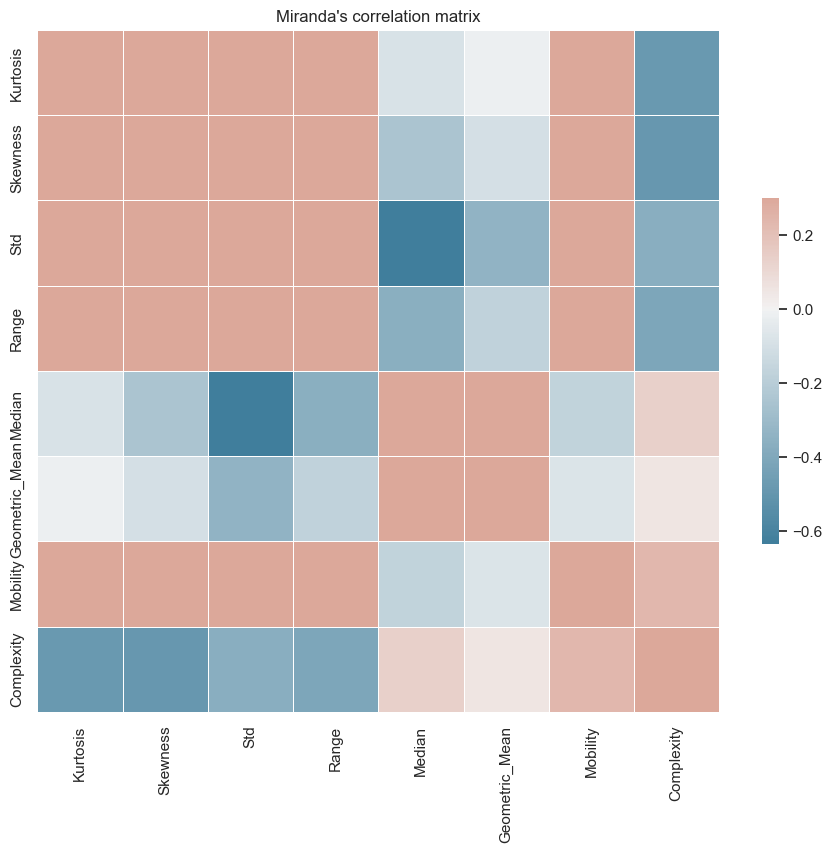

In [28]:
import seaborn as sns
sns.set_theme(style="dark")
corr = sc_MirandaX_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Miranda's correlation matrix")
plt.show()

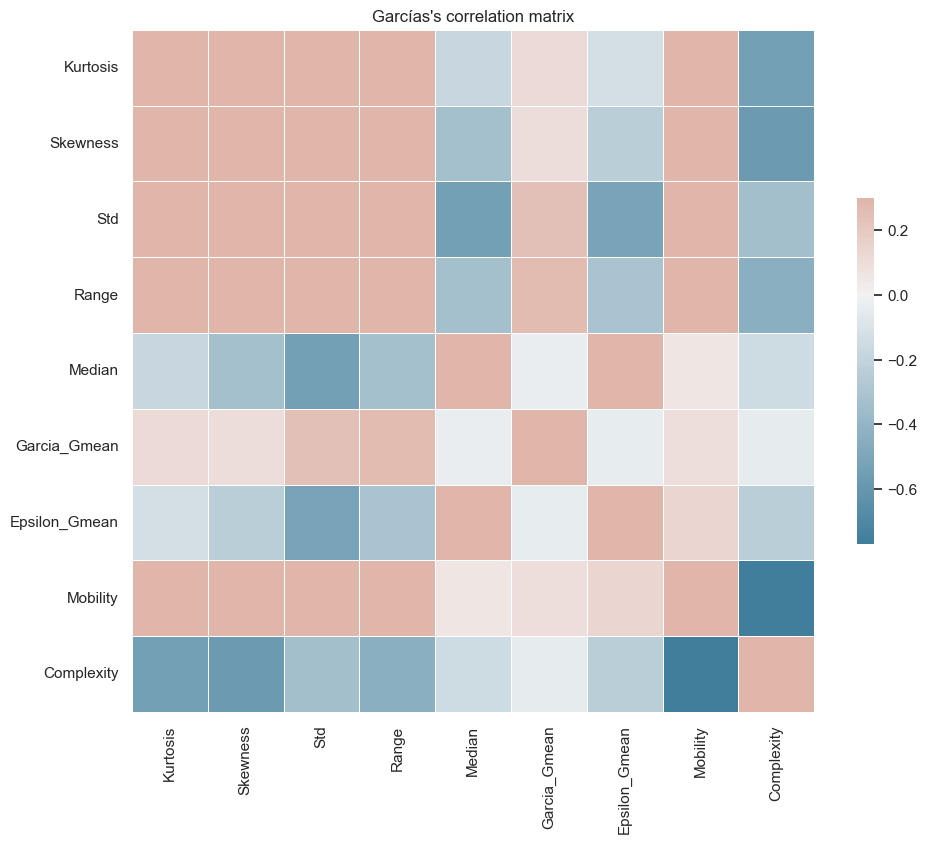

In [29]:
sns.set_theme(style="dark")
corr = sc_GarciaX_train.corr()
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
ax.tick_params(axis='x', rotation=90)
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}).set_title("Garcías's correlation matrix")
plt.show()